# Example usage of py-wsi

Author: @ysbecca


In [1]:
from py_wsi import *

Set parameters for file directory of SVS images, patch size, level (magnification), and overlap.

In [2]:
file_dir = "/Users/ysbecca/ysbecca-projects/py-wsi/wsi_data/"
patch_size = 256
level = 12
db_location = ""
db_name = "patch_db"
overlap = 0

Create a new py-wsi manager object for our collection of svs images. It's called a turtle.

In [3]:
turtle = Turtle(file_dir, db_location, db_name)

20 WSI found in directory.


The Turtle object keeps track of how many WSI images are in its collection, and the LMDB that stores the patches and their info.

In [4]:
print("Total WSI images:    " + str(turtle.num_files))
print("LMDB name:           " + str(turtle.db_name))
print("File names:          " + str(turtle.files))

Total WSI images:    20
LMDB name:           patch_db
File names:          ['01.svs' '02.svs' '03.svs' '04.svs' '05.svs' '06.svs' '07.svs' '08.svs'
 '09.svs' '10.svs' '11.svs' '12.svs' '13.svs' '14.svs' '15.svs' '16.svs'
 '17.svs' '18.svs' '19.svs' '20.svs']


Sample patches now and store them in a new LMDB database. This actually creates two databases, one for the patches themselves and another for the image metadata, specifically, the tile dimensions. The second database is only used internally, for retrieving patches from the first database.

In [4]:
turtle.sample_and_store_patches(patch_size, level, overlap)

Creating new LMDB environment...
01.svs 02.svs 03.svs 04.svs 05.svs 06.svs 07.svs 08.svs 09.svs 10.svs 11.svs 12.svs 13.svs 14.svs 15.svs 16.svs 17.svs 18.svs 19.svs 20.svs 
====== LMDB patch_db Stats ======
{'psize': 4096, 'depth': 2, 'branch_pages': 1, 'leaf_pages': 31, 'overflow_pages': 119462, 'entries': 2438}
====== LMDB patch_db_meta Stats ======
{'psize': 4096, 'depth': 1, 'branch_pages': 0, 'leaf_pages': 1, 'overflow_pages': 0, 'entries': 20}
Time usage: 0:06:44


Now we can create a Dataset object which loads all the patches from the LMDB. Alternatively, the turtle object can be used by any other dataset object or input format required for the next stage of processing.

In [5]:
import dataset as ds
import imagepy_toolkit

In [11]:
dataset = ds.read_datasets(turtle,
                set_id=1,
                valid_id=0,
                total_sets=5,
                shuffle_all=True,
                augment=False)

We can see the dataset information read in from the LMDB:

In [12]:
print("Total training set images:     " + str(len(dataset.train.images)))
print("Total validation set images:   " + str(len(dataset.valid.images)))

Total training set images:     571
Total validation set images:   429


And can view some of the original patches (using a helper function from [imagepy-toolkit](https://github.com/ysbecca/imagepy-toolkit)):

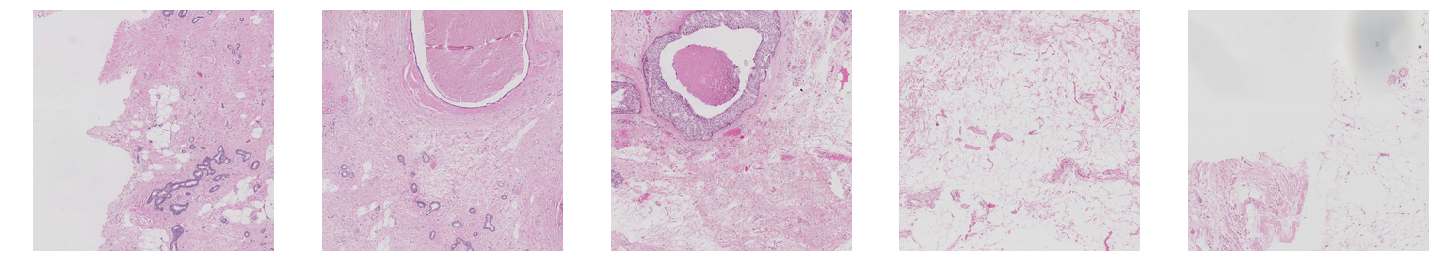

In [14]:
imagepy_toolkit.show_images(dataset.train.images, 5, 1)